In [1]:
from PIL import Image as pil_image  # pillow probably?
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xx, yy = np.meshgrid(np.arange(200), np.arange(200))

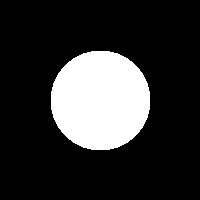

In [3]:
xcent, ycent, rad = 100, 100, 50
circle = ((xx - xcent)**2 + (yy - ycent)**2) < rad**2
pil_image.fromarray(circle)

## (Hemi)sphere Normals

sphere:
$$x^2 + y^2 + z^2 = r^2 \\
z^2 = r^2 - x^2 - y^2 \\
$$

In [4]:
# select pixels in the sphere projection
# (already what the `circle` bool array is)

# for each, where x/y is given, compute z
zsq = rad**2 - (xx-xcent)**2 - (yy-ycent)**2
z = np.sqrt(np.clip(zsq, 0, 1e100))

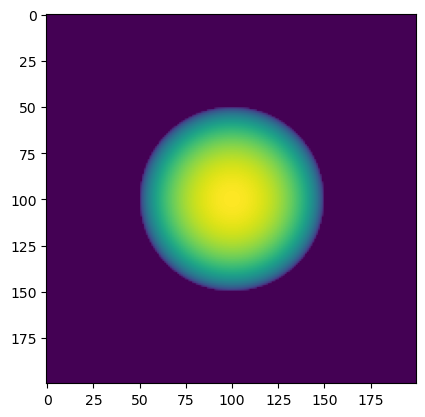

In [5]:
plt.imshow(z)

In [6]:
# then scale that to get the normal vector out from the center
xvec = (xx - xcent).astype('float64')
yvec = (yy - ycent).astype('float64')
zvec = z - 0
veclen = np.sqrt(xvec**2 + yvec**2 + zvec**2)
xvec /= veclen
yvec /= veclen
zvec /= veclen

xvec[z==0] = 0
yvec[z==0] = 0
zvec[z==0] = 1

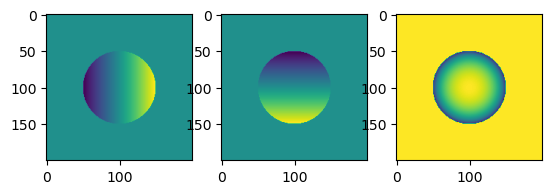

In [7]:
f, axs = plt.subplots(1, 3)
axs[0].imshow(xvec)
axs[1].imshow(yvec)
axs[2].imshow(zvec)

```
  X: -1 to +1 :  Red:     0 to 255
  Y: -1 to +1 :  Green:   0 to 255
  Z:  0 to -1 :  Blue:  128 to 255
```

In [8]:
min50max = [0, 50, 100]
np.percentile(xvec, min50max), np.percentile(yvec, min50max), np.percentile(zvec, min50max)

(array([-0.98,  0.  ,  0.98]),
 array([-0.98,  0.  ,  0.98]),
 array([0.02828427, 1.        , 1.        ]))

In [9]:
r = ((xvec + 1) * 255/2).astype("uint8")
g = ((yvec + 1) * 255/2).astype("uint8")
b = ((zvec + 1) * 255/2).astype("uint8")

np.percentile(r, min50max), np.percentile(g, min50max), np.percentile(b, min50max)

(array([  2., 127., 252.]),
 array([  2., 127., 252.]),
 array([131., 255., 255.]))

In [10]:
norm_colors = np.dstack((r, g, b))

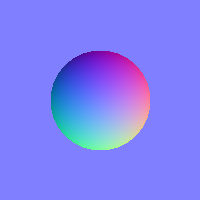

In [11]:
pil_image.fromarray(norm_colors)

Looks OK, but upside-down? Unsure if some of my coordinates are backwards or if I computed the normal map for the 'wrong' surface of the sphere